In [1]:
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import whiten, kmeans2

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/440/teams', 'teams')

In [5]:
comp = list()
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    undo = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals_one = f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            goals_two = f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0                       
        else:
            goals_one = f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            goals_two = f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        undo += (goals_two > goals_one)
    comp.append({'name': team['name'], "price": random.randint(1000000, 100000000), 'undo': undo})

In [6]:
extr = pd.DataFrame(comp)
del extr['name']

In [7]:
whitened = whiten(extr.as_matrix())

In [10]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}


def get_scatter(cluster_num):
    centroids, cluster_map = kmeans2(whitened, cluster_num)
    colors = [colors_map[c] for c in cluster_map]
    extr.plot.scatter(x='price', y='undo', c=colors, s=100)

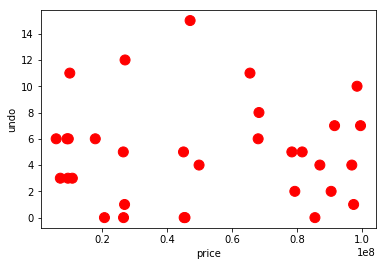

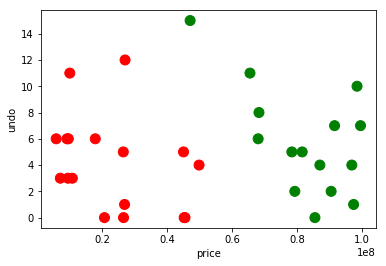

In [12]:
get_scatter(1)
get_scatter(2)